In [624]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import re
import codecs
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [443]:
df1 = pd.read_csv('./data/gamespot_reviews.csv')

In [581]:
df1.head(10)

,date,developer,genre,rating,reviews,title,userrate
0,"Apr 27, 2017",Relic,"Real-Time,Strategy",8.0,33,"Warhammer 40,000: Dawn of War III",5.0
1,"Jan 22, 2002",Strategy First,"Turn-Based,Strategy",NaN,1074,Disciples II: Dark Prophecy,8.4
2,"Feb 11, 2004",EA Phenomic,"Strategy,Real-Time",7.9,1788,SpellForce: The Order of Dawn,8.3
3,"May 12, 2003","Nival Interactive,La Plata,ACTive Gaming,Intex...","Real-Time,Strategy",7.0,1046,Blitzkrieg,8.0
4,"May 17, 2005","Robosoft Technologies,Pyro Studios","Real-Time,Strategy",6.7,6,Imperial Glory,8.0
5,"Apr 5, 2005","Handmark,Sandlot Games,Astraware","Strategy,Management",7.2,87,Tradewinds 2,7.4
6,"May 5, 2006",Spellbound,"Real-Time,Strategy",6.1,506,Desperados 2: Cooper's Revenge,7.3
7,"Sep 29, 2006",Introversion,"Real-Time,Strategy",8.1,991,DEFCON: Everybody Dies,8.3
8,"Sep 29, 2006",Dark Fox,"Strategy,Real-Time",5.2,116,Silent Heroes,6.9
9,"Oct 25, 2005",Firaxis Games,"Strategy,Turn-Based",NaN,22287,Sid Meier's Civilization IV,8.8


In [575]:
df2 = pd.read_csv('./data/steam_review3.csv', names = ['title', 'steam_review', 'price'], )
df2.head(10)

,title,steam_review,price
0,Counter-Strike: Global Offensive,"Very Positive<br>88% of the 2,647,991 user rev...",$14.99
1,Tom Clancy's Rainbow Six Siege,"Very Positive<br>80% of the 174,250 user revie...",$14.99
2,Dota 2,"Very Positive<br>87% of the 914,333 user revie...",Free to Play
3,Endless Space 2,"Very Positive<br>80% of the 8,076 user reviews...",$39.99
4,Tabletop Simulator,"Very Positive<br>93% of the 7,169 user reviews...",$19.99
5,XCOM 2,"Very Positive<br>80% of the 19,811 user review...",$59.99
6,Endless Legend,"Very Positive<br>82% of the 11,160 user review...",$29.99
7,RimWorld,"Overwhelmingly Positive<br>97% of the 19,856 u...",$29.99
8,Divinity: Original Sin 2,"Very Positive<br>94% of the 27,939 user review...",$44.99
9,SMITE,"Very Positive<br>82% of the 38,173 user review...",Free to Play


In [382]:
reviews = df2.steam_review.str.findall('\d+,?\d*,?\d*')

In [577]:
reviews.head()

0    [88, 2,647,991]
1      [80, 174,250]
2      [87, 914,333]
3        [80, 8,076]
4        [93, 7,169]
Name: steam_review, dtype: object

In [578]:
df2['review_num'] = reviews
df2.head(10)

,title,steam_review,price,review_num
0,Counter-Strike: Global Offensive,"Very Positive<br>88% of the 2,647,991 user rev...",$14.99,"[88, 2,647,991]"
1,Tom Clancy's Rainbow Six Siege,"Very Positive<br>80% of the 174,250 user revie...",$14.99,"[80, 174,250]"
2,Dota 2,"Very Positive<br>87% of the 914,333 user revie...",Free to Play,"[87, 914,333]"
3,Endless Space 2,"Very Positive<br>80% of the 8,076 user reviews...",$39.99,"[80, 8,076]"
4,Tabletop Simulator,"Very Positive<br>93% of the 7,169 user reviews...",$19.99,"[93, 7,169]"
5,XCOM 2,"Very Positive<br>80% of the 19,811 user review...",$59.99,"[80, 19,811]"
6,Endless Legend,"Very Positive<br>82% of the 11,160 user review...",$29.99,"[82, 11,160]"
7,RimWorld,"Overwhelmingly Positive<br>97% of the 19,856 u...",$29.99,"[97, 19,856]"
8,Divinity: Original Sin 2,"Very Positive<br>94% of the 27,939 user review...",$44.99,"[94, 27,939]"
9,SMITE,"Very Positive<br>82% of the 38,173 user review...",Free to Play,"[82, 38,173]"


In [ ]:
reviews2 = reviews.astype(list)
reviews2.fillna([0,0])

In [579]:
steam_rate = []
steam_num = []
for i in range(0, len(reviews)):
    if reviews[i] is not np.NaN:
        steam_rate.append(reviews[i][0])
        steam_num.append(reviews[i][1])
    else:
        steam_rate.append('0')
        steam_num.append('0')
    

In [ ]:
steam_rate

In [ ]:
steam_num

In [580]:
df2['steam_review'] = steam_rate
df2['review_num'] = steam_num

In [394]:
df2.review_num = df2.review_num.str.replace(',', '')

In [400]:
df2.steam_review = df2.steam_review.astype(int)
df2.review_num = df2.review_num.astype(int)

In [402]:
df2.price = df2.price.str.replace('$', '')

In [408]:
df2 = df2.loc[df2.price != 'Free to Play']

In [433]:
df2 = df2.loc[df2.price.isna() == False]
df2 = df2.loc[df2.price.str.contains('[^\d.]') == False]

In [436]:
df2.price = df2.price.astype(float)

In [445]:
df3 = pd.merge(df1, df2, how = 'left', on = 'title')

In [446]:
df4 = pd.merge(df1, df2, how = 'inner', on = 'title')

In [ ]:
df4.title.unique()

In [612]:
df4.steam_review = df4.steam_review / 10
df4.head(10)

,date,developer,genre,rating,reviews,title,userrate,steam_review,price,review_num
0,2017-04-27,Relic,"Real-Time,Strategy",8.0,33,"Warhammer 40,000: Dawn of War III",5.0,4.6,39.99,7299
1,2005-05-17,"Robosoft Technologies,Pyro Studios","Real-Time,Strategy",6.7,6,Imperial Glory,8.0,7.8,4.99,651
3,2005-10-25,Firaxis Games,"Turn-Based,Strategy",8.0,22287,Sid Meier's Civilization IV,8.8,9.2,19.99,970
5,2005-10-25,Firaxis Games,"Turn-Based,Strategy",9.4,22287,Sid Meier's Civilization IV,8.8,9.2,19.99,970
6,2011-02-13,"1C,THQ,Digitalmindsoft","Real-Time,Strategy",8.0,202,Men of War: Assault Squad,8.0,8.7,9.99,2359
7,1995-02-28,"Culture Brain,MicroProse","Strategy,Turn-Based",7.2,735,X-COM: Terror From the Deep,8.4,9.2,4.99,308
8,2011-07-11,"The Lordz Games Studio,Flashback Games","Strategy,Turn-Based",8.0,186,Panzer Corps,7.8,9.1,19.99,807
9,2011-08-02,Nitro Games,Strategy,3.5,160,Pirates of Black Cove,4.4,5.8,9.99,84
10,2011-05-26,"Apportable,Mode 7 Games","Strategy,Turn-Based",8.5,238,Frozen Synapse,7.5,9.0,24.99,959
12,2011-09-16,NeocoreGames,"Strategy,Real-Time",7.5,51,King Arthur: Fallen Champions,5.7,4.5,4.99,20


In [613]:
df3.steam_review = df3.steam_review / 10
df3.head(10)

,date,developer,genre,rating,reviews,title,userrate,steam_review,price,review_num
0,"Apr 27, 2017",Relic,"Real-Time,Strategy",8.0,33,"Warhammer 40,000: Dawn of War III",5.0,4.6,39.99,7299.0
2,"Feb 11, 2004",EA Phenomic,"Strategy,Real-Time",7.9,1788,SpellForce: The Order of Dawn,8.3,NaN,NaN,NaN
3,"May 12, 2003","Nival Interactive,La Plata,ACTive Gaming,Intex...","Real-Time,Strategy",7.0,1046,Blitzkrieg,8.0,NaN,NaN,NaN
4,"May 17, 2005","Robosoft Technologies,Pyro Studios","Real-Time,Strategy",6.7,6,Imperial Glory,8.0,7.8,4.99,651.0
5,"Apr 5, 2005","Handmark,Sandlot Games,Astraware","Strategy,Management",7.2,87,Tradewinds 2,7.4,NaN,NaN,NaN
6,"May 5, 2006",Spellbound,"Real-Time,Strategy",6.1,506,Desperados 2: Cooper's Revenge,7.3,NaN,NaN,NaN
7,"Sep 29, 2006",Introversion,"Real-Time,Strategy",8.1,991,DEFCON: Everybody Dies,8.3,NaN,NaN,NaN
8,"Sep 29, 2006",Dark Fox,"Strategy,Real-Time",5.2,116,Silent Heroes,6.9,NaN,NaN,NaN
10,"Mar 11, 2008",Haemimont Games,"Strategy,Management",3.5,437,Imperium Romanum,7.0,NaN,NaN,NaN
11,"Sep 25, 2007","Blue Byte,Ubisoft","Management,Strategy",6.0,1822,The Settlers: Rise of an Empire,7.5,NaN,NaN,NaN


In [647]:
df3 = df3.loc[df3.rating.isnull() == False]
df4 = df4.loc[df4.rating.isnull() == False]
df4.head(10)

,date,developer,genre,rating,reviews,title,userrate,steam_review,price,review_num
0,2017-04-27,Relic,"Real-Time,Strategy",8.0,33,"Warhammer 40,000: Dawn of War III",5.0,4.6,39.99,7299
1,2005-05-17,"Robosoft Technologies,Pyro Studios","Real-Time,Strategy",6.7,6,Imperial Glory,8.0,7.8,4.99,651
3,2005-10-25,Firaxis Games,"Turn-Based,Strategy",8.0,22287,Sid Meier's Civilization IV,8.8,9.2,19.99,970
5,2005-10-25,Firaxis Games,"Turn-Based,Strategy",9.4,22287,Sid Meier's Civilization IV,8.8,9.2,19.99,970
6,2011-02-13,"1C,THQ,Digitalmindsoft","Real-Time,Strategy",8.0,202,Men of War: Assault Squad,8.0,8.7,9.99,2359
7,1995-02-28,"Culture Brain,MicroProse","Strategy,Turn-Based",7.2,735,X-COM: Terror From the Deep,8.4,9.2,4.99,308
8,2011-07-11,"The Lordz Games Studio,Flashback Games","Strategy,Turn-Based",8.0,186,Panzer Corps,7.8,9.1,19.99,807
9,2011-08-02,Nitro Games,Strategy,3.5,160,Pirates of Black Cove,4.4,5.8,9.99,84
10,2011-05-26,"Apportable,Mode 7 Games","Strategy,Turn-Based",8.5,238,Frozen Synapse,7.5,9.0,24.99,959
12,2011-09-16,NeocoreGames,"Strategy,Real-Time",7.5,51,King Arthur: Fallen Champions,5.7,4.5,4.99,20


In [633]:
rating_df1 = df3[['rating', 'userrate']]
rating_df1.columns = ['Gamespot_Rating', 'User_Rating']

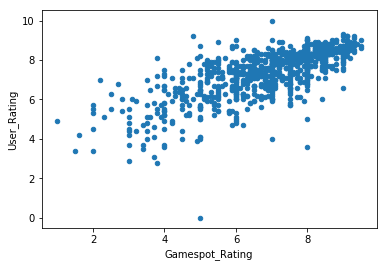

In [634]:
rating_df1.plot.scatter(x = 'Gamespot_Rating', y = 'User_Rating')

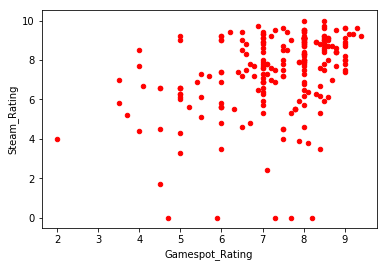

In [635]:
rating_df2 = df4[['rating', 'steam_review']]
rating_df2.columns = ['Gamespot_Rating', 'Steam_Rating']
rating_df2.plot.scatter(x = 'Gamespot_Rating', y = 'Steam_Rating', c = 'red')

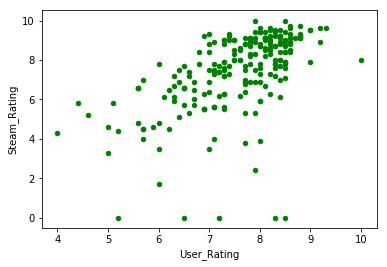

In [636]:
rating_df3 = df4[['userrate', 'steam_review']]
rating_df3.columns = ['User_Rating', 'Steam_Rating']
rating_df3.plot.scatter(x = 'User_Rating', y = 'Steam_Rating', c = 'green')

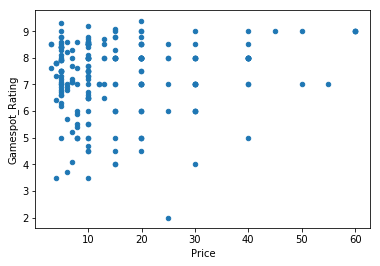

In [637]:
rating_price_df = df4[['rating', 'userrate','steam_review','price']]
rating_price_df.columns = ['Gamespot_Rating', 'User_Rating', 'Steam_Rating', 'Price']
rating_price_df.plot.scatter(x = 'Price', y = 'Gamespot_Rating')

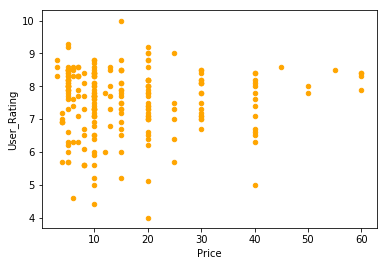

In [638]:
rating_price_df.plot.scatter(x = 'Price', y = 'User_Rating', c = 'orange')

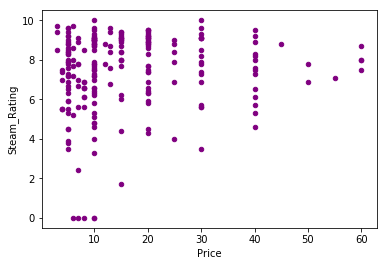

In [639]:
rating_price_df.plot.scatter(x = 'Price', y = 'Steam_Rating', c = 'purple')

In [ ]:
df4.date = df4.date.str.replace('^1994', 'Jan 1, 1994')
df4.date = df4.date.str.replace('October', 'Oct 1,')
df4.date.unique()

In [506]:
df4.date = list(map(lambda x: datetime.datetime.strptime(x, '%b %d, %Y'), df4.date))

In [525]:
df4_sorted = df4.sort_values('date', ascending = False)

In [530]:
rate_price_df2 = df4.loc[df4.date > datetime.datetime(2010, 1,1)]

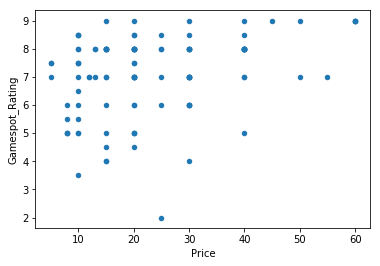

In [632]:
rate_price_df2 = rate_price_df2[['rating', 'userrate','steam_review','price']]
rate_price_df2.columns = ['Gamespot_Rating', 'User_Rating', 'Steam_Rating', 'Price']
rate_price_df2.plot.scatter(x = 'Price', y = 'Gamespot_Rating')

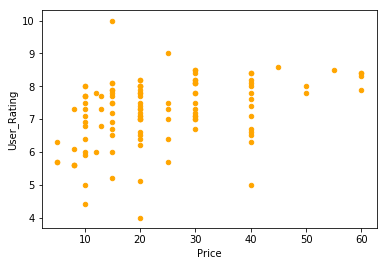

In [640]:
rate_price_df2.plot.scatter(x = 'Price', y = 'User_Rating', c = 'orange')

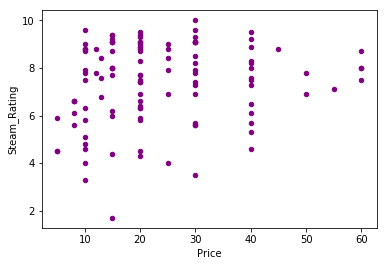

In [641]:
rate_price_df2.plot.scatter(x = 'Price', y = 'Steam_Rating', c = 'purple')

In [642]:
rating_price_df.corr()

,Gamespot_Rating,User_Rating,Steam_Rating,Price
Gamespot_Rating,1.000000,0.663504,0.389354,0.134097
User_Rating,0.663504,1.000000,0.562863,0.043872
Steam_Rating,0.389354,0.562863,1.000000,0.108329
Price,0.134097,0.043872,0.108329,1.000000


In [643]:
rate_price_df2.corr()

,Gamespot_Rating,User_Rating,Steam_Rating,Price
Gamespot_Rating,1.000000,0.613318,0.552696,0.333582
User_Rating,0.613318,1.000000,0.696225,0.375938
Steam_Rating,0.552696,0.696225,1.000000,0.163598
Price,0.333582,0.375938,0.163598,1.000000


Will try to do linear model for userrate and price

In [542]:
x_vector = rate_price_df2.price
y_vector = rate_price_df2.userrate

def linear_model(x_vec, y_vec):
    x_bar = np.mean(x_vec)
    y_bar = np.mean(y_vec)
    beta1 = sum(list(map(lambda x, y: (x-x_bar)*(y-y_bar), x_vec, y_vec))) / sum(list(map(lambda x: (x-x_bar)**2, x_vec)))
    beta0 = y_bar - beta1 * x_bar
    return (beta0, beta1)

In [566]:
coefficients = linear_model(x_vector, y_vector)
coefficients

(6.561737928252088, 0.028585338600546815)

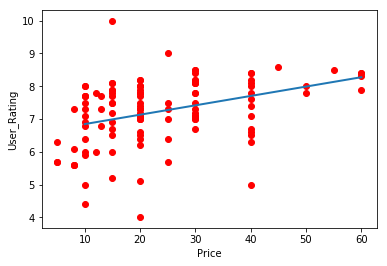

In [645]:
plt.scatter(rate_price_df2.Price, rate_price_df2.User_Rating, color = 'red')
plt.plot([10, 60], [coefficients[1]*10+coefficients[0], coefficients[1]*60 + coefficients[0]], lw = 2)
plt.xlabel("Price")
plt.ylabel("User_Rating")
plt.show()

In [586]:
def t_test(x_vec, y_vec):
    beta = linear_model(x_vec, y_vec)
    x_bar = np.mean(x_vec)
    n = len(x_vec)
    RSS = sum(list(map(lambda x, y: (y-beta[0]-beta[1]*x)**2, x_vec, y_vec)))
    sigma = math.sqrt(RSS/(n-2))
    SEbeta = sigma / math.sqrt(sum(list(map(lambda x: (x - x_bar)**2, x_vec))))
    return beta[1] / SEbeta


In [587]:
t_test(x_vector, y_vector)

4.293510702219795

In [611]:
stats.t.pdf(t_test(x_vector,y_vector), df = len(x_vector)-2)

7.263299839980417e-05

In [618]:
y_vector2 = rate_price_df2.steam_review
coeff2 = linear_model(x_vector, y_vector2)
coeff2

(6.889319477465851, 0.02099944798344926)

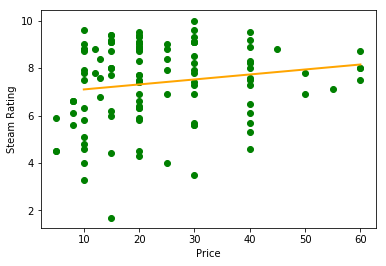

In [646]:
plt.scatter(rate_price_df2.Price, rate_price_df2.Steam_Rating, color = 'green')
plt.plot([10, 60], [coeff2[1]*10+coeff2[0], coeff2[1]*60 + coeff2[0]], lw = 2, color = 'orange')
plt.xlabel("Price")
plt.ylabel("Steam Rating")
plt.show()

In [630]:
plt.xlabel?

In [619]:
t_test(x_vector, y_vector2)

1.7550043124620975

In [620]:
stats.t.pdf(t_test(x_vector, y_vector2), df= len(x_vector)-2)

0.08595253450145139

In [656]:
df3.genre

0        Real-Time,Strategy
2        Strategy,Real-Time
3        Real-Time,Strategy
4        Real-Time,Strategy
5       Strategy,Management
6        Real-Time,Strategy
7        Real-Time,Strategy
8        Strategy,Real-Time
10      Strategy,Management
11      Management,Strategy
12       Real-Time,Strategy
13      Management,Strategy
14       Real-Time,Strategy
15      Strategy,Turn-Based
16      Strategy,Turn-Based
17      Strategy,Turn-Based
18                 Strategy
19      Strategy,Turn-Based
21       Strategy,Real-Time
22       Strategy,Real-Time
23       Real-Time,Strategy
24       Strategy,Real-Time
25      Management,Strategy
26       Strategy,Real-Time
27       Strategy,Real-Time
28       Strategy,Real-Time
29      Management,Strategy
30       Real-Time,Strategy
31      Turn-Based,Strategy
32      Strategy,Turn-Based
               ...         
971      Real-Time,Strategy
972     Management,Strategy
973      Strategy,Real-Time
974     Strategy,Turn-Based
975     Strategy,Tur

In [703]:
df_genre = df3.copy()    #copy ensure df_genre and df is not reference same address location
# Split the column the column using '|'
df_genre.genre = df_genre.genre.apply(lambda x: x.split(','))

index=0
# save [index, genre] in a nested list
list_ = []
for item in df_genre.genre:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
genre.head(10)

,index,genres
0,0,Real-Time
1,0,Strategy
2,1,Strategy
3,1,Real-Time
4,2,Real-Time
5,2,Strategy
6,3,Real-Time
7,3,Strategy
8,4,Strategy
9,4,Management


In [709]:
df3

,date,developer,genre,rating,reviews,title,userrate,steam_review,price,review_num
0,"Apr 27, 2017",Relic,"Real-Time,Strategy",8.0,33,"Warhammer 40,000: Dawn of War III",5.0,4.6,39.99,7299.0
2,"Feb 11, 2004",EA Phenomic,"Strategy,Real-Time",7.9,1788,SpellForce: The Order of Dawn,8.3,NaN,NaN,NaN
3,"May 12, 2003","Nival Interactive,La Plata,ACTive Gaming,Intex...","Real-Time,Strategy",7.0,1046,Blitzkrieg,8.0,NaN,NaN,NaN
4,"May 17, 2005","Robosoft Technologies,Pyro Studios","Real-Time,Strategy",6.7,6,Imperial Glory,8.0,7.8,4.99,651.0
5,"Apr 5, 2005","Handmark,Sandlot Games,Astraware","Strategy,Management",7.2,87,Tradewinds 2,7.4,NaN,NaN,NaN
6,"May 5, 2006",Spellbound,"Real-Time,Strategy",6.1,506,Desperados 2: Cooper's Revenge,7.3,NaN,NaN,NaN
7,"Sep 29, 2006",Introversion,"Real-Time,Strategy",8.1,991,DEFCON: Everybody Dies,8.3,NaN,NaN,NaN
8,"Sep 29, 2006",Dark Fox,"Strategy,Real-Time",5.2,116,Silent Heroes,6.9,NaN,NaN,NaN
10,"Mar 11, 2008",Haemimont Games,"Strategy,Management",3.5,437,Imperium Romanum,7.0,NaN,NaN,NaN
11,"Sep 25, 2007","Blue Byte,Ubisoft","Management,Strategy",6.0,1822,The Settlers: Rise of an Empire,7.5,NaN,NaN,NaN


In [697]:
genre

,index,genres
0,0,Real-Time
1,0,Strategy
2,1,Strategy
3,1,Real-Time
4,2,Real-Time
5,2,Strategy
6,3,Real-Time
7,3,Strategy
8,4,Strategy
9,4,Management


In [707]:
df_genre = pd.merge(df_genre.reset_index().drop('genre', axis=1), genre, how='right', left_index=True, right_on='index')

In [710]:
df_genre = df_genre.loc[df_genre.genres != "Strategy"]

Text(0,0.5,'Average Gamespot Rating')

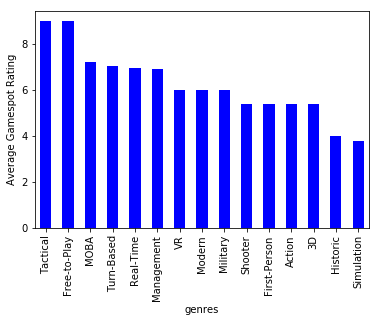

In [711]:
df_genre.groupby('genres')['rating'].mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.ylabel("Average Gamespot Rating")

Text(0,0.5,'Number of Titles')

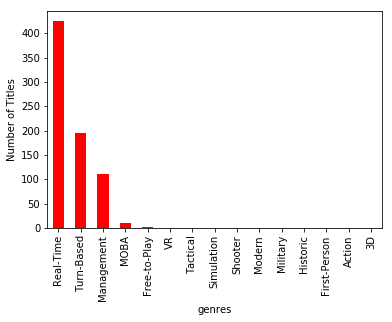

In [712]:
df_genre.groupby('genres')['title'].count().sort_values(ascending = False).plot.bar(color = 'red')
plt.ylabel("Number of Titles")

In [695]:
df3

,date,developer,genre,rating,reviews,title,userrate,steam_review,price,review_num
0,"Apr 27, 2017",Relic,"Real-Time,Strategy",8.0,33,"Warhammer 40,000: Dawn of War III",5.0,4.6,39.99,7299.0
2,"Feb 11, 2004",EA Phenomic,"Strategy,Real-Time",7.9,1788,SpellForce: The Order of Dawn,8.3,NaN,NaN,NaN
3,"May 12, 2003","Nival Interactive,La Plata,ACTive Gaming,Intex...","Real-Time,Strategy",7.0,1046,Blitzkrieg,8.0,NaN,NaN,NaN
4,"May 17, 2005","Robosoft Technologies,Pyro Studios","Real-Time,Strategy",6.7,6,Imperial Glory,8.0,7.8,4.99,651.0
5,"Apr 5, 2005","Handmark,Sandlot Games,Astraware","Strategy,Management",7.2,87,Tradewinds 2,7.4,NaN,NaN,NaN
6,"May 5, 2006",Spellbound,"Real-Time,Strategy",6.1,506,Desperados 2: Cooper's Revenge,7.3,NaN,NaN,NaN
7,"Sep 29, 2006",Introversion,"Real-Time,Strategy",8.1,991,DEFCON: Everybody Dies,8.3,NaN,NaN,NaN
8,"Sep 29, 2006",Dark Fox,"Strategy,Real-Time",5.2,116,Silent Heroes,6.9,NaN,NaN,NaN
10,"Mar 11, 2008",Haemimont Games,"Strategy,Management",3.5,437,Imperium Romanum,7.0,NaN,NaN,NaN
11,"Sep 25, 2007","Blue Byte,Ubisoft","Management,Strategy",6.0,1822,The Settlers: Rise of an Empire,7.5,NaN,NaN,NaN


In [713]:
df_dev = df3.copy()    
df_dev.developer = df_dev.developer.apply(lambda x: x.split(','))

index=0
# save [index, genre] in a nested list
list_ = []
for item in df_dev.developer:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
dev = pd.DataFrame(list_, columns=['index', 'developers'])
dev.head(10)

,index,developers
0,0,Relic
1,1,EA Phenomic
2,2,Nival Interactive
3,2,La Plata
4,2,ACTive Gaming
5,2,Intex Publishing
6,3,Robosoft Technologies
7,3,Pyro Studios
8,4,Handmark
9,4,Sandlot Games


In [715]:
df_dev = pd.merge(df_dev.reset_index().drop('developer', axis=1), dev, how='right', left_index=True, right_on='index')

Text(0,0.5,'Number of Titles')

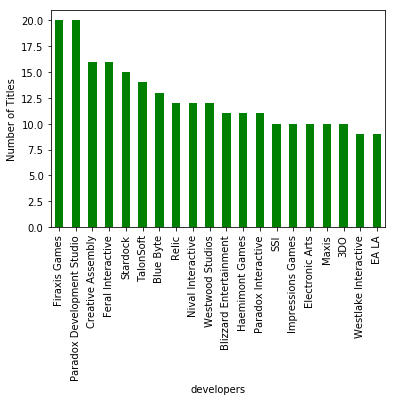

In [719]:
df_dev.groupby('developers')['title'].count().sort_values(ascending = False).head(20).plot.bar(color = 'green')
plt.ylabel('Number of Titles')

Text(0,0.5,'Average Gamespot Rating')

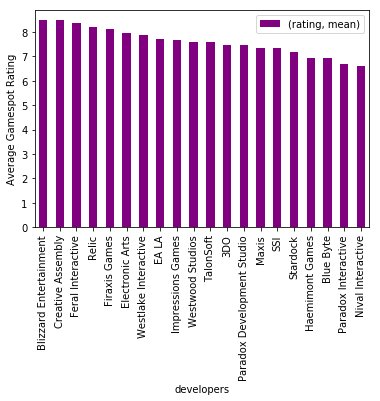

In [746]:
df_dev.groupby('developers')[['rating', 'title']].agg(['count', 'mean']).sort_values(by = ('rating','count'), ascending = False)\
.head(20).sort_values(('rating','mean'), ascending = False).plot.bar(y = ('rating', 'mean'), color = 'purple')
plt.legend()
plt.ylabel('Average Gamespot Rating')

In [744]:
plt.legend?